In [1]:
!pip install -q pandas numpy scikit-learn seaborn matplotlib

You should consider upgrading via the 'C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from sklearn.datasets import load_wine

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score
import pandas as pd
import numpy as np

In [4]:
data = load_wine()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
df = pd.DataFrame(data=data["data"],columns=data["feature_names"])

In [7]:
df['target'] = data.target

In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
df["target"].unique()

array([0, 1, 2])

<Axes: >

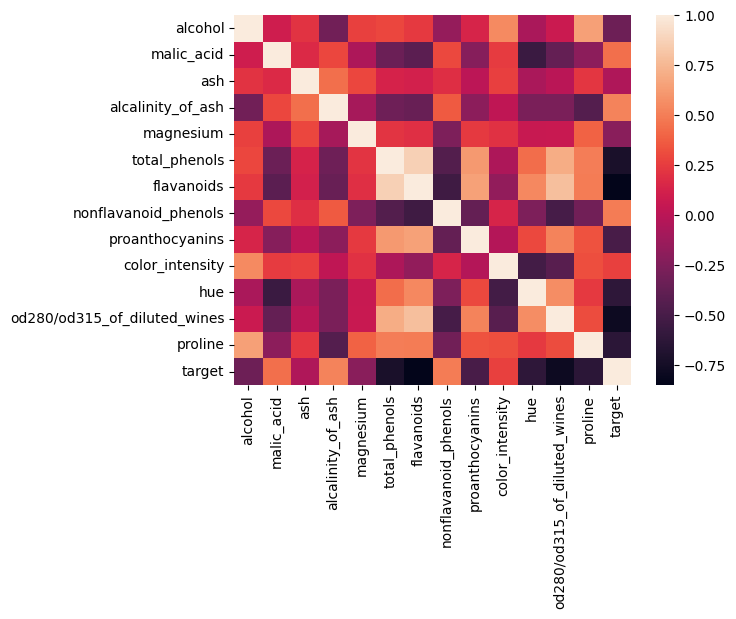

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

In [13]:
df.corr().abs()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,0.310235,0.270798,0.289101,0.236815,0.155929,0.136698,0.546364,0.071747,0.072343,0.643720,0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,0.054575,0.335167,0.411007,0.292977,0.220746,0.248985,0.561296,0.368710,0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,0.074667,0.003911,0.223626,0.049643
alcalinity_of_ash,0.310235,0.288500,0.443367,1.000000,0.083333,0.321113,0.351370,0.361922,0.197327,0.018732,0.273955,0.276769,0.440597,0.517859
magnesium,0.270798,0.054575,0.286587,0.083333,1.000000,0.214401,0.195784,0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.209179
total_phenols,0.289101,0.335167,0.128980,0.321113,0.214401,1.000000,0.864564,0.449935,0.612413,0.055136,0.433681,0.699949,0.498115,0.719163
flavanoids,0.236815,0.411007,0.115077,0.351370,0.195784,0.864564,1.000000,0.537900,0.652692,0.172379,0.543479,0.787194,0.494193,0.847498
nonflavanoid_phenols,0.155929,0.292977,0.186230,0.361922,0.256294,0.449935,0.537900,1.000000,0.365845,0.139057,0.262640,0.503270,0.311385,0.489109
proanthocyanins,0.136698,0.220746,0.009652,0.197327,0.236441,0.612413,0.652692,0.365845,1.000000,0.025250,0.295544,0.519067,0.330417,0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,0.055136,0.172379,0.139057,0.025250,1.000000,0.521813,0.428815,0.316100,0.265668


No feature with too near colinearlity

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=34)

In [15]:
neigh =KNeighborsClassifier()
# .fit(X_train, y_train)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
print(neigh.n_neighbors, neigh.classes_, neigh._fit_X)

5 [0 1 2] [[1.377e+01 1.900e+00 2.680e+00 ... 1.130e+00 2.930e+00 1.375e+03]
 [1.356e+01 1.730e+00 2.460e+00 ... 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 3.860e+00 2.320e+00 ... 8.400e-01 2.010e+00 5.150e+02]
 ...
 [1.242e+01 2.550e+00 2.270e+00 ... 8.600e-01 3.300e+00 3.150e+02]
 [1.242e+01 4.430e+00 2.730e+00 ... 9.200e-01 3.120e+00 3.650e+02]
 [1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]]


In [17]:
print(accuracy_score(y_test,neigh.predict(X_test)))
print(recall_score(y_test, neigh.predict(X_test),average="weighted"))
print(precision_score(y_test,neigh.predict(X_test),average="weighted"))
print(f1_score(y_test,neigh.predict(X_test),average="weighted"))

0.7222222222222222
0.7222222222222222
0.7095238095238094
0.7123015873015873


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data.data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data.target, test_size=0.20, random_state=34)

In [20]:
neigh =KNeighborsClassifier()
# .fit(X_train, y_train)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
print(accuracy_score(y_test,neigh.predict(X_test)))
print(recall_score(y_test, neigh.predict(X_test),average="weighted"))
print(precision_score(y_test,neigh.predict(X_test),average="weighted"))
print(f1_score(y_test,neigh.predict(X_test),average="weighted"))

0.9722222222222222
0.9722222222222222
0.9742063492063492
0.9722222222222222


In [22]:
conf = confusion_matrix(y_test, neigh.predict(X_test))

<Axes: >

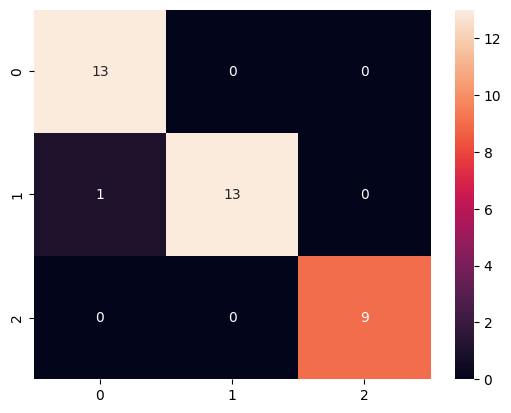

In [23]:
sns.heatmap(conf,annot=True)

HYPERPARAMETER TUNING Logisitic Regression

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':[1,3,5,4],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric':['euclidean', 'manhattan', 'minkowski', 'cosine']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn,param_grid=params,cv=5,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sandeep.nataraja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sandeep.nataraja\AppData\Local\

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine'],
                         'n_neighbors': [1, 3, 5, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [25]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.9578817733990148


In [26]:
best_knn = grid_search.best_estimator_

In [27]:
print(accuracy_score(y_test,best_knn.predict(X_test)))
print(recall_score(y_test, best_knn.predict(X_test),average="weighted"))
print(precision_score(y_test,best_knn.predict(X_test),average="weighted"))
print(f1_score(y_test,best_knn.predict(X_test),average="weighted"))

0.9722222222222222
0.9722222222222222
0.9742063492063492
0.9722222222222222


<Axes: >

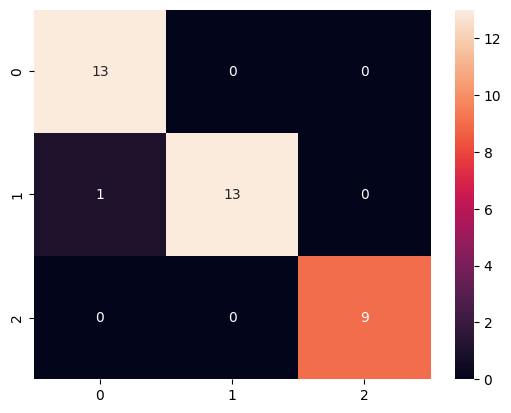

In [28]:
conf = confusion_matrix(y_test,best_knn.predict(X_test))
sns.heatmap(conf,annot=True)

In [29]:
import matplotlib.pyplot as plt

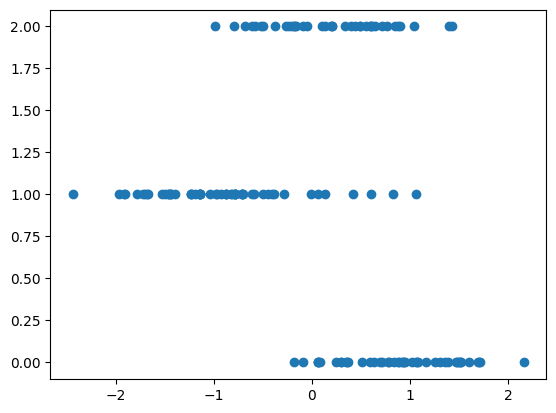

In [30]:
plt.scatter(X_train[:,0],y_train)

In [31]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']